***
### Case Study - Predict Diabetes using healthcare data 
***

<b>Data Source: </b>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. <br>

<b> Objective: </b>The objective of the dataset is to diagnostically <b>predict whether or not a patient has diabetes</b>, based on certain <br>
diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. <br>
In particular, all patients here are females at least 21 years old of <b>Pima Indian heritage</b>.

<b>Dataset Description: </b> The datasets consists of several medical predictor variables and <u>one target variable</u>, <b>Outcome</b>. <u>Predictor variables</u> includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

<b>Pregnancies:</b> Number of times pregnant<br>
<b>Glucose:</b> Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
<b>BloodPressure:</b> Diastolic blood pressure (mm Hg)<br>
<b>SkinThickness:</b> Triceps skin fold thickness (mm)<br>
<b>Insulin:</b> 2-Hour serum insulin (mu U/ml)<br>
<b>BMI:</b> Body mass index (weight in kg/(height in m)^2)<br>
<b>DiabetesPedigreeFunction:</b> Diabetes pedigree function<br>
<b>Age:</b> Age (years)<br>
<b>Outcome:</b> Class variable (0 or 1) 268 of 768 are 1, the others are 0<br>



In [1]:
# import libraries and turn off warning messages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.)

import scipy.stats as stats
from sklearn import preprocessing 


from sklearn import model_selection, linear_model, feature_selection,ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score, auc,roc_curve, confusion_matrix, precision_score, recall_score, f1_score


from sklearn import neighbors, svm, tree

# for ensemble
from sklearn.tree import DecisionTreeRegressor


from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from imblearn.over_sampling import SMOTE 

import warnings;
warnings.filterwarnings('ignore');


In [2]:
# read the given data set
df = pd.read_csv(r"health care diabetes.csv",)

***
### Data Overview
***

In [3]:
# check the dataset dimension
print (df.shape)
# there are 768 records with 9 columns

(768, 9)


In [4]:
# Columns in the given dataset
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
# Checking the columns and their datatypes
df.info()

# There are 9 columns, 768 records, no null data, 7 columns contain integer and 2 float datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### All Columns except BMI and DiabetesPedigreeFunction are integer. BMI and DiabetesPedigreeFunction columns are float.


In [6]:
# a quick glance of the provided data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#--- Checking for null values
sum_val = df.isnull().sum()
mean_val = df.isnull().mean()
n =  pd.concat([sum_val, mean_val], axis =1)
n.rename(columns = {0: 'Count', 1: 'Percentage'}, inplace = True)
n

,Count,Percentage
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


##### There are no null values

***
### Data Preprocessing
***


In [8]:
# summary Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***
#### Quick analysis
***

- <b>Pregnancies:</b> Value range: 0 - 17, with a median of 3. Max value is too high for number of pregnancies
- <b> Glucose: </b> Value range: 0 - 199. Glucose level 0 is not realistic. <u> Will treat 0 as missing data. </u> Max value can be possible.
- <b> BloodPressure: </b> Value range: 0 - 122. Blood Pressure 0 is not realistic. <u> Will treat 0 as missing data. </u>Maximum value can be possible.
- <b>SkinThickness:</b> Value range: 0 to 846. Skin thinkness 0 is not realistic. <u> Will treat 0 as missing data. </u>
- <b>Insulin: </b> Value range: 0 to 846. Insulin value 0 is not realistic. <u> Will treat 0 as missing data. </u>
- <b>BMI: </b> Value range: 0 to 67.1. Body mass index cannot be 0. <u> Will treat 0 as missing data. </u>
- <b>DiabetesPedigreeFunction: </b>Value range: .078 - 2.42. 
- <b>Age: </b>Value range: 21 - 81. 

<b> Replacing zeros with NaN for easy count of actual values.</b>
Will replace missing values later with appropriate values <br>


#### feature and target variables
- <strong> Target variable </strong>: Outcome. Need to predict diabetes outcome using this dataset
- <strong> Predictor variables </strong>: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age

In [9]:
# copying the original dataframe in a separate dataframe
df_cp = df.copy(deep = True)

***
##### Check for missing values
Replacing the 0 values for the predictor variables with Null values.
This will help to identify the missing data

In [10]:
# replace 0 with null for predictor variables
features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df_cp[features]= df_cp[features].replace(0,np.NaN)

## showing the count of Nans
print(df_cp.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


***
##### Export the dataframe to csv file for Tableau Visualization


In [11]:
df_cp.to_csv(r'diabetes_output.csv', index= True)

In [12]:
# gather all predictor variables
features = df.columns


# Function to display the data frequency for each of the predictor variables

def display_hist(df):
    '''
    This function will take a dataframe and display histograms side by side.
    It places 4 histograms per row and can accomodate to display only 8 variables.
    
    '''
    sns.set_style("white")
    fig, axs = plt.subplots(2,4, figsize=(20, 10))

    sns.histplot(data=df, x=features[0], kde=True, ax=axs[0,0])
    sns.histplot(data=df, x=features[1], kde=True, ax=axs[0,1])
    sns.histplot(data=df, x=features[2], kde=True, ax=axs[0,2])
    sns.histplot(data=df, x=features[3], kde=True, ax=axs[0,3])

    sns.histplot(data=df, x=features[4], kde=True, ax=axs[1,0])
    sns.histplot(data=df, x=features[5], kde=True, ax=axs[1,1])
    sns.histplot(data=df, x=features[6], kde=True, ax=axs[1,2])
    sns.histplot(data=df, x=features[7], kde=True, ax=axs[1,3])
    
    plt.show()
    



##### Display the histograms for all Predictor variables before handling outliers and 0 values

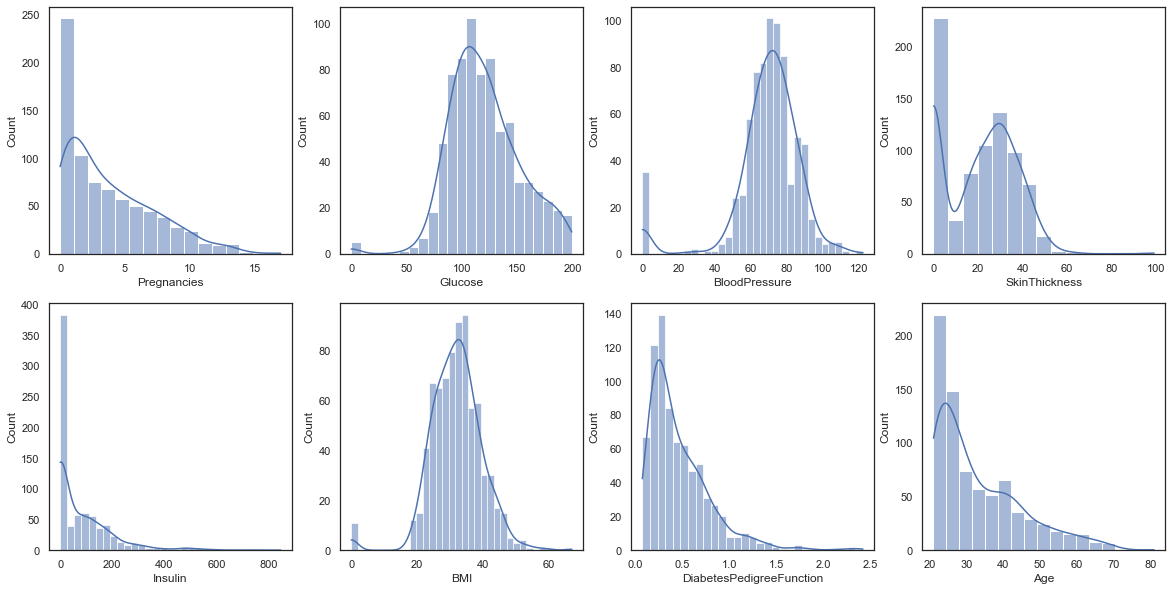

In [13]:
display_hist(df)

In [14]:
df_cp = df.copy(deep = True) # copying the original data for future comparison

***
#### Outlier and missing value handling
***

Before creating models, it is important to clean the given dataset. With missing or outlier data, the model prediction will be inaccurate. 
For classification models, the prediction heavily depends on the predictor variable values.

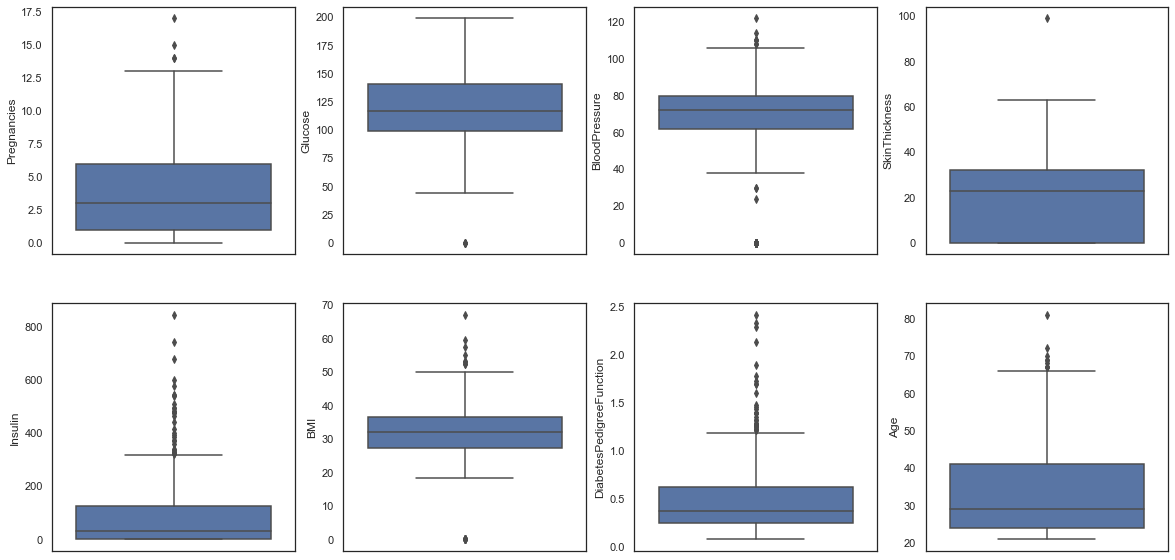

In [15]:
def display_outliers(df):
    fig, axes = plt.subplots(ncols = 4, nrows=2, figsize = (20,10))
    p= sns.boxplot(data = df, y= features[0], ax= axes[0,0])
    p= sns.boxplot(data = df, y= features[1], ax= axes[0,1])
    p= sns.boxplot(data = df, y= features[2], ax= axes[0,2])
    p = sns.boxplot(data = df, y= features[3], ax= axes[0,3])
    p=sns.boxplot(data = df, y= features[4], ax= axes[1,0])
    p=sns.boxplot(data = df, y= features[5], ax= axes[1,1])
    p= sns.boxplot(data = df, y= features[6], ax= axes[1,2])
    p= sns.boxplot(data = df, y= features[7], ax= axes[1,3])
    
display_outliers(df)

<br>
<b> Observations </b>
<br>
- All fields, Pregancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age contain quite outliers <br>

For Pregnancies, the lowest value can be 0, but for Glucose, BloodPressure, SkinThickness,Insulin, BMI and Diabetes seems unreal <br>
<b>Approach:</b> Based on the data distribution, will analyse each of these variables separately and will replace 0 and outliers either with median or Inter Quartile Range.
<br> Also, will take into account how each of these variables got distributed for the Target variable values. That is important as this is a classification problem.

In [16]:
# Function to return the inter quartile range values for any dataset

def feature_boundaries(df, ft):
    ''' Function accepts dataframe and feature, 
    returns lower, upper boundaries and median
    '''
    
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    median = df[ft].median()
    iqr = q3 - q1
    lower_boundary = q1 - 1.5*iqr
    upper_boundary = q3 + 1.5*iqr
    print(df[ft].describe())
    print('Interquartile Range: ', iqr)
    print('25%: ', q1)
    print('75%: ', q3)
    print('Lower Limit: ', lower_boundary)
    print('Upper Limit: ', upper_boundary)
    return (q1,q3,lower_boundary, upper_boundary, median, iqr)



In [17]:
# Function to return how each predictor variable data is distributed among the Target variable values
def target_feature_data_dist(df, ft):
    '''
    This function takes the dataframe=df and feature = ft.
    It prints the data statistics for the input feature based on the target variable Output
    '''
    ft_stats = pd.concat([df[df['Outcome']==0][ft].describe(), df[df['Outcome']==1][ft].describe()], axis =1 )
    ft_stats.columns = ['Outcome 0', 'Outcome 1']
    print(ft_stats)
    

# Function to return median, inter quartile range for each predictor variable per target variable values    
def mts(df, ft, ot):  # median, 25%,75%
    '''
    input parameters: df = dataframe, ft= feature, ot =0 or 1
    returns median, 25% and 75% for feature and outcome condition
    '''

    med = df[df['Outcome']==ot][ft].describe()['50%']
    tfp = df[df['Outcome']==ot][ft].describe()['25%']
    sfp = df[df['Outcome']==ot][ft].describe()['75%']
    
    iqr = sfp - tfp
    lower_boundary = tfp - 1.5*iqr
    upper_boundary = sfp + 1.5*iqr
    return med, tfp,sfp, lower_boundary, upper_boundary

***
##### Pregnancies outlier and missing data handling

In [18]:
# collect the IQR values for pregnancies variable
q1,q3,lb, ub,med,iqr = feature_boundaries(df,'Pregnancies')


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
Interquartile Range:  5.0
25%:  1.0
75%:  6.0
Lower Limit:  -6.5
Upper Limit:  13.5


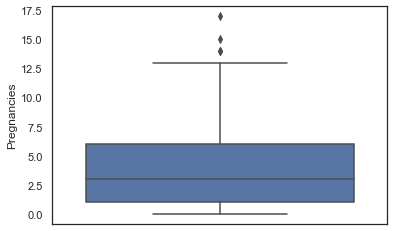

In [19]:
# Display the boxplot
p = sns.boxplot(data = df, y= 'Pregnancies')

###### The pregnancies data got some values that are pretty high like 17 and higher

In [20]:
# get Pregnancy data statistics per Outcome values 0 and 1

target_feature_data_dist(df, 'Pregnancies')

        Outcome 0   Outcome 1
count  500.000000  268.000000
mean     3.298000    4.865672
std      3.017185    3.741239
min      0.000000    0.000000
25%      1.000000    1.750000
50%      2.000000    4.000000
75%      5.000000    8.000000
max     13.000000   17.000000


###### Pregnancies can be 0. For outliers that are higher than upper whiskers, I will replace those with their respective median

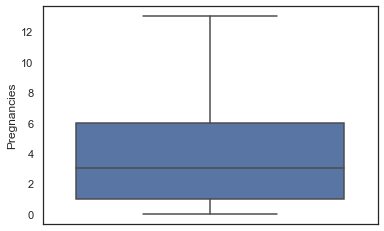

In [21]:

# fixing outliers for outcome 0 pregnancy data
median_zero =  mts(df, 'Pregnancies',0) 
ub_pr = median_zero[4] ## median for the pregnancies under Outcome value 0

df.loc[(df['Pregnancies']>ub) & (df['Outcome'] ==0), 'Pregnancies']=median_zero[0] 

# fixing outliers for outcome 1 pregnancy data
median_one = mts(df, 'Pregnancies',1) ## median for the pregnancies under Outcome value 1
df.loc[(df['Pregnancies']>ub) & (df['Outcome'] ==1), 'Pregnancies']=median_one[0]

p = sns.boxplot(data = df, y= 'Pregnancies')

###### Now the Pregnancies data is clean as there is no outlier

***
##### Glucose Outlier and missing data handling

In [22]:
# Collection IQR range values for Glucose column
q1, q3,lb, ub,med,iqr = feature_boundaries(df,'Glucose')

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
Interquartile Range:  41.25
25%:  99.0
75%:  140.25
Lower Limit:  37.125
Upper Limit:  202.125


<b>Observation:</b> The minimum value for Glucose is set as 0. Clearly that is unreaslitic. Also, the maximum value is set as 199. This is also pretty high.

In [23]:
# get Glucose data statistics per Outcome values 0 and 1

target_feature_data_dist(df, 'Glucose')

       Outcome 0   Outcome 1
count   500.0000  268.000000
mean    109.9800  141.257463
std      26.1412   31.939622
min       0.0000    0.000000
25%      93.0000  119.000000
50%     107.0000  140.000000
75%     125.0000  167.000000
max     197.0000  199.000000


For Outcome 0, the max value is 197. This is definitely bad data. Also, glucose level 0 is impossible.
Similarly for Outcome 1, the minimum value 0 or maximum value 199 are just bad data. Clinically, these will never happen.

Will replace the minimum values with respective median values for Outcome 0 and 1 and upper values with their respective 3rd Quartile

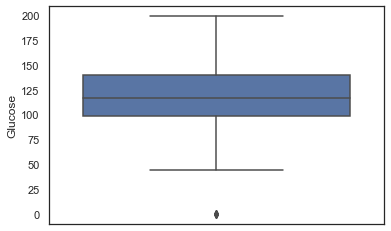

In [24]:
# box plot with the outliers
p = sns.boxplot(data = df, y= 'Glucose')

In [25]:
med_zero =  mts(df, 'Glucose',0) # IQR range values for Outcome 0
med_one =  mts(df, 'Glucose',1) # IQR range values for Outcome 1

## for outcome 0 and 1 and glucose level higher than 3rd Quartile
df.loc[(df['Glucose']>q3) & (df['Outcome'] ==0), 'Glucose']= med_zero[2] # q3: 75% for the entire Glucose column; med_zero[2]: 3rd Quartile for Outcome0
df.loc[(df['Glucose']>q3) & (df['Outcome'] ==1), 'Glucose']= med_one[2]

## for outcome 0 and 1 and glucose level lower than 1st Quartile
df.loc[(df['Glucose']<q1) & (df['Outcome'] ==0), 'Glucose'] = med_zero[0]  # q1: 25% for the entire Glucose column; med_zero[0]: median for Outcome 1
df.loc[(df['Glucose']<q1) & (df['Outcome'] ==1), 'Glucose'] = med_one[0]

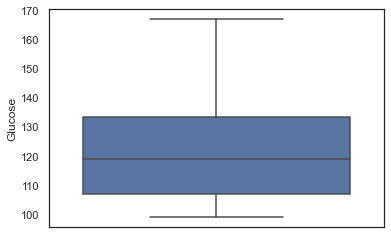

In [26]:
p = sns.boxplot(data = df, y= 'Glucose')

###### Now there are no outliers for Glucose data. The data seems clean.

***
##### BloodPressure Outlier and missing data handling

In [27]:
# BloodPressure outlier handling
q1, q3, lb, ub,med,iqr = feature_boundaries(df,'BloodPressure')


count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
Interquartile Range:  18.0
25%:  62.0
75%:  80.0
Lower Limit:  35.0
Upper Limit:  107.0


<b>Observation: </b> The minimum value 0 for blood preesure is clearly bad data. The mean and median values are around 70s. <br>
The maximum value seems too high for Diastolic blood pressure. 

In [28]:
# get Blood Pressure data statistics per Outcome values 0 and 1

target_feature_data_dist(df, 'BloodPressure')

        Outcome 0   Outcome 1
count  500.000000  268.000000
mean    68.184000   70.824627
std     18.063075   21.491812
min      0.000000    0.000000
25%     62.000000   66.000000
50%     70.000000   74.000000
75%     78.000000   82.000000
max    122.000000  114.000000


I will replace higher values more than 95 with the 3 quartile values for individual Outcome 0 and 1 to bring back the outliers within the acceptable range.
The blood pressure cannot be 0.  Will replace them with the individual median values for Outcome 0 and 1

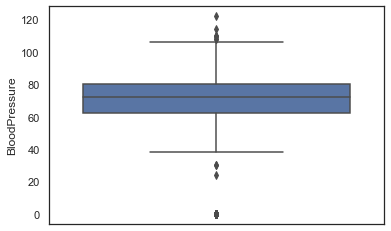

In [29]:
p = sns.boxplot(data = df, y= 'BloodPressure')

###### It got outliers both above and below the whiskers.

In [30]:
med_zero =  mts(df, 'BloodPressure',0) 
med_one =  mts(df, 'BloodPressure',1)

df.loc[(df['BloodPressure']>95) & (df['Outcome'] ==0), 'BloodPressure']= med_zero[2] # med_zero[2] : 75% 
df.loc[(df['BloodPressure']>95) & (df['Outcome'] ==1), 'BloodPressure']= med_one[2]

df.loc[(df['BloodPressure']<q1) & (df['Outcome'] ==0), 'BloodPressure'] = med_zero[0] # med_zero[1]: median
df.loc[(df['BloodPressure']<q1) & (df['Outcome'] ==1), 'BloodPressure'] = med_one[0]

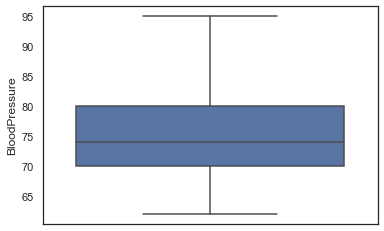

In [31]:
p = sns.boxplot(data = df, y= 'BloodPressure')

###### Now there are no outliers. And the minimum value is also not 0. BloodPressure column is cleaned

***
##### SkinThickness Outlier and missing data handling

In [32]:
# SkinThickness IQR ranges
q1, q3, lb, ub,med,iqr = feature_boundaries(df,'SkinThickness')
print(med,iqr)

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
Interquartile Range:  32.0
25%:  0.0
75%:  32.0
Lower Limit:  -48.0
Upper Limit:  80.0
23.0 32.0


In [33]:
# get SkinThickness data statistics per Outcome values 0 and 1

target_feature_data_dist(df, 'SkinThickness')

        Outcome 0   Outcome 1
count  500.000000  268.000000
mean    19.664000   22.164179
std     14.889947   17.679711
min      0.000000    0.000000
25%      0.000000    0.000000
50%     21.000000   27.000000
75%     31.000000   36.000000
max     60.000000   99.000000


<b>Observation </b> The minimum value 0 for both Outcome 0 and 1 seems bad or missing data.
For 1st quartile range for both Outcome 0 and 1 is also 0.

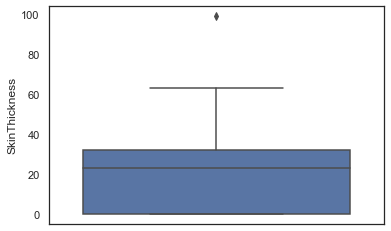

In [34]:
#Box plot with the outliers
p = sns.boxplot(data = df, y= 'SkinThickness')

###### For outliers that are higher than upper whiskers, I will replace those with median for the entire skin thickness data, and for lower outliers, replacing them with 1st Quartile of the entire Skin Thickness data

In [35]:
# collecting IQR ranges for Outcome 0 and 1
med_zero =  mts(df, 'SkinThickness',0) 
med_one =  mts(df, 'SkinThickness',1)
print(med_zero, ub,lb, med)
print(med_one,ub,lb)

(21.0, 0.0, 31.0, -46.5, 77.5) 80.0 -48.0 23.0
(27.0, 0.0, 36.0, -54.0, 90.0) 80.0 -48.0


In [36]:
 # q3: 75% IQR for entire SkinThickness data, med: Median for entire SkinThickness data
df.loc[(df['SkinThickness']>q3) & (df['Outcome'] ==0), 'SkinThickness']= med
df.loc[(df['SkinThickness']>q3) & (df['Outcome'] ==1), 'SkinThickness']= med

df.loc[(df['SkinThickness']<med) & (df['Outcome'] ==0), 'SkinThickness'] = med_zero[0]
df.loc[(df['SkinThickness']<med) & (df['Outcome'] ==1), 'SkinThickness'] = med_one[0]

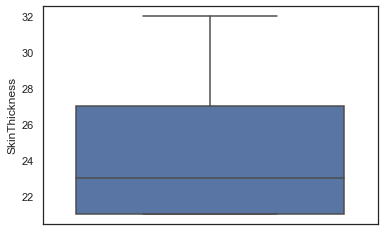

In [37]:
# box plot after the data is cleaned
p = sns.boxplot(data = df, y= 'SkinThickness')

###### Now there are no 0 values. Also the outliers are gone. So, SkinThickness data is cleaned now.

***
##### Insulin Outlier and missing data handling

In [38]:
# Insulin IQR ranges
q1, q3, lb, ub,med,iqr = feature_boundaries(df,'Insulin')
print(lb,ub,med, q1, q3)

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
Interquartile Range:  127.25
25%:  0.0
75%:  127.25
Lower Limit:  -190.875
Upper Limit:  318.125
-190.875 318.125 30.5 0.0 127.25


<b>Observation: </b> The 1st quartile value is 0. This is clinically not possible. Also , the maximum value seems unrealistic too

In [39]:
# get Insulin data statistics per Outcome values 0 and 1

target_feature_data_dist(df, 'Insulin')

        Outcome 0   Outcome 1
count  500.000000  268.000000
mean    68.792000  100.335821
std     98.865289  138.689125
min      0.000000    0.000000
25%      0.000000    0.000000
50%     39.000000    0.000000
75%    105.000000  167.250000
max    744.000000  846.000000


For outliers that are higher than upper whiskers, will replace those with 3rd Quartile IQR value for the entire Insulin data.
For the minimum value that are below 50% I will replace them by the overall median for Insulin.
This is because, for outcome 1, the minimum, 25% and 50% all are 0s

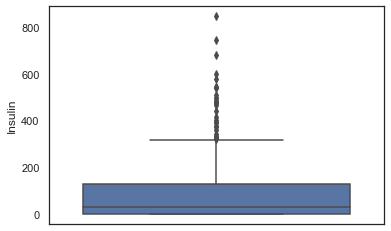

In [40]:
# outliers before cleaning the data
p = sns.boxplot(data = df, y= 'Insulin')

In [41]:
# collecting IQR ranges for individual Insulin data under Outcome 0 and 1
med_zero =  mts(df, 'Insulin',0) 
med_one =  mts(df, 'Insulin',1)
print(med_zero, lb, ub, med)
print(med_one, lb, ub)

(39.0, 0.0, 105.0, -157.5, 262.5) -190.875 318.125 30.5
(0.0, 0.0, 167.25, -250.875, 418.125) -190.875 318.125


In [42]:
df.loc[(df['Insulin']<med) & (df['Outcome'] ==0), 'Insulin']= med # med: median for the entire Insulin data
df.loc[(df['Insulin']<med) & (df['Outcome'] ==1), 'Insulin']= med

df.loc[(df['Insulin']> q3) & (df['Outcome'] ==0), 'Insulin']= q3 # q3: 75% IQR for the entire Insulin data
df.loc[(df['Insulin']> q3) & (df['Outcome'] ==1), 'Insulin']= q3

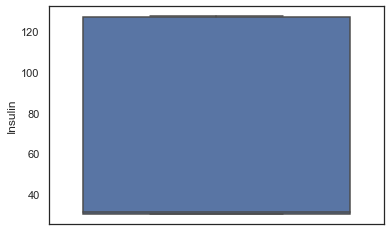

In [43]:


p = sns.boxplot(data = df, y= 'Insulin')

###### Now there are no outliers. Also the minimum valu looks decent. Insulin data is now cleaned

***
##### BMI Outlier and missing data handling

In [44]:
# BMI IQR ranges
q1, q3,lb, ub,med,iqr = feature_boundaries(df,'BMI')


count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
Interquartile Range:  9.3
25%:  27.3
75%:  36.6
Lower Limit:  13.35
Upper Limit:  50.550000000000004


In [45]:
# get BMI data statistics per Outcome values 0 and 1

target_feature_data_dist(df, 'BMI')

        Outcome 0   Outcome 1
count  500.000000  268.000000
mean    30.304200   35.142537
std      7.689855    7.262967
min      0.000000    0.000000
25%     25.400000   30.800000
50%     30.050000   34.250000
75%     35.300000   38.775000
max     57.300000   67.100000


<b>Observation: </b> The minimum value 0 for BMI is clinically not possible. Also the maximum value is quite high compared to the mean value

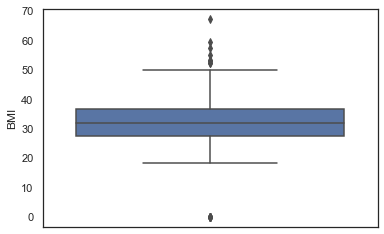

In [46]:
# the plot with the outliers
p = sns.boxplot(data = df, y= 'BMI')

For outliers that are higher than upper whiskers, will replace those with 3rd Quartile. Minimum value 0 can be replaced 1st Quartile value

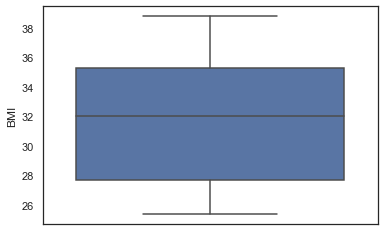

In [47]:
med_zero =  mts(df, 'BMI',0) 
med_one =  mts(df, 'BMI',1)

df.loc[(df['BMI']>q3) & (df['Outcome'] ==0), 'BMI']=med_zero[2] # q3: 75% of the entire BMI column, med_zero[2]: 75% IQR for BMI data under Outcome 0
df.loc[(df['BMI']>q3) & (df['Outcome'] ==1), 'BMI']= med_one[2]

df.loc[(df['BMI']<q1) & (df['Outcome'] ==0), 'BMI']=med_zero[1] # q1: 25% IQR of the entire BMI column, med_zero[1]: 25% IQR for BMI data under Outcome 0
df.loc[(df['BMI']<q1) & (df['Outcome'] ==1), 'BMI']= med_one[1]


# plot after the data is cleaned
p = sns.boxplot(data = df, y= 'BMI')

###### Now the 0s are gone. The outliers are also gone. BMI data is now cleaned

***
##### DiabetesPedigreeFunction Outlier and missing data handling

In [48]:
# DiabetesPedigreeFunction IQR ranges
q1, q3, lb, ub,med,iqr = feature_boundaries(df,'DiabetesPedigreeFunction')


count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
Interquartile Range:  0.38249999999999995
25%:  0.24375
75%:  0.62625
Lower Limit:  -0.32999999999999996
Upper Limit:  1.2


<b>Observation: </b> The data is too sparsed. The maximum and minimum values are far away from each other

In [49]:
# get DiabetesPedigreeFunction data statistics per Outcome values 0 and 1

target_feature_data_dist(df, 'DiabetesPedigreeFunction')

        Outcome 0   Outcome 1
count  500.000000  268.000000
mean     0.429734    0.550500
std      0.299085    0.372354
min      0.078000    0.088000
25%      0.229750    0.262500
50%      0.336000    0.449000
75%      0.561750    0.728000
max      2.329000    2.420000


For outliers that are higher than upper whiskers, will replace those with 3rd Quartile. Not have much knowledge on pedigreeFunction value range.
So keeping the lower value as is

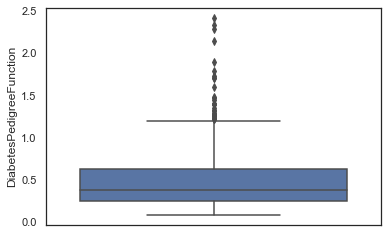

In [50]:
# Box plot with the outliers
p = sns.boxplot(data = df, y= 'DiabetesPedigreeFunction')

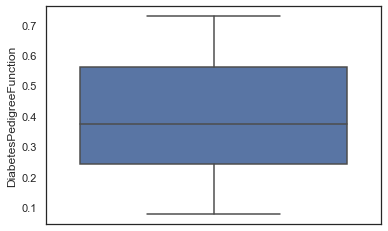

In [51]:
med_zero =  mts(df, 'DiabetesPedigreeFunction',0) # IQR range for Outcome 0
med_one =  mts(df, 'DiabetesPedigreeFunction',1) # IQR range for Outcome 1

# q3: 75% IQR for the entire column, med_zero[2] is the 75% IQR for DiabetesPedigreeFunction under Outcome 0
df.loc[(df['DiabetesPedigreeFunction']>q3) & (df['Outcome'] ==0), 'DiabetesPedigreeFunction']=med_zero[2] 
df.loc[(df['DiabetesPedigreeFunction']>q3) & (df['Outcome'] ==1), 'DiabetesPedigreeFunction']= med_one[2]

# Box plot after the data is cleaned
p = sns.boxplot(data = df, y= 'DiabetesPedigreeFunction')

###### Now the outliers are gone. DiabetesPedigreeFunction column is cleaned now.

***
##### Age Outlier and missing data handling

In [52]:
# Age outlier handling
q1, q3,lb, ub,med,iqr = feature_boundaries(df,'Age')


count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
Interquartile Range:  17.0
25%:  24.0
75%:  41.0
Lower Limit:  -1.5
Upper Limit:  66.5


<Observation: </b> The maximum and minimum age is reasonable.

In [53]:
# get Age data statistics per Outcome values 0 and 1

target_feature_data_dist(df, 'Age')

        Outcome 0   Outcome 1
count  500.000000  268.000000
mean    31.190000   37.067164
std     11.667655   10.968254
min     21.000000   21.000000
25%     23.000000   28.000000
50%     27.000000   36.000000
75%     37.000000   44.000000
max     81.000000   70.000000


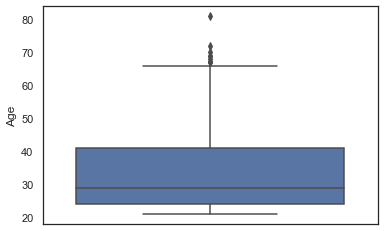

In [54]:
# plot with the outliers
p = sns.boxplot(data = df, y= 'Age')

For outliers that are higher than upper whiskers, will replace those with 3rd Quartile. Looks like Upper bound 66 is an outlier, so reducing the upper limit to 60

In [55]:
# IQR ranges for individual Outcome
med_zero =  mts(df, 'Age',0) 
med_one =  mts(df, 'Age',1)
print (med_zero, ub, lb,med)
print(med_one, ub, lb, med)

(27.0, 23.0, 37.0, 2.0, 58.0) 66.5 -1.5 29.0
(36.0, 28.0, 44.0, 4.0, 68.0) 66.5 -1.5 29.0


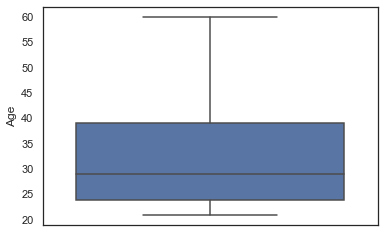

In [56]:
med_zero =  mts(df, 'Age',0) 
med_one =  mts(df, 'Age',1)

df.loc[(df['Age']> 60) & (df['Outcome'] ==0), 'Age']=med_zero[2] # med_zero[2] is 75% IQR for Age data under Outcome 1
df.loc[(df['Age']> 60) & (df['Outcome'] ==1), 'Age']= med_one[2]

p = sns.boxplot(data = df, y= 'Age')

###### Now the outliers are gone. Age data is now cleaned

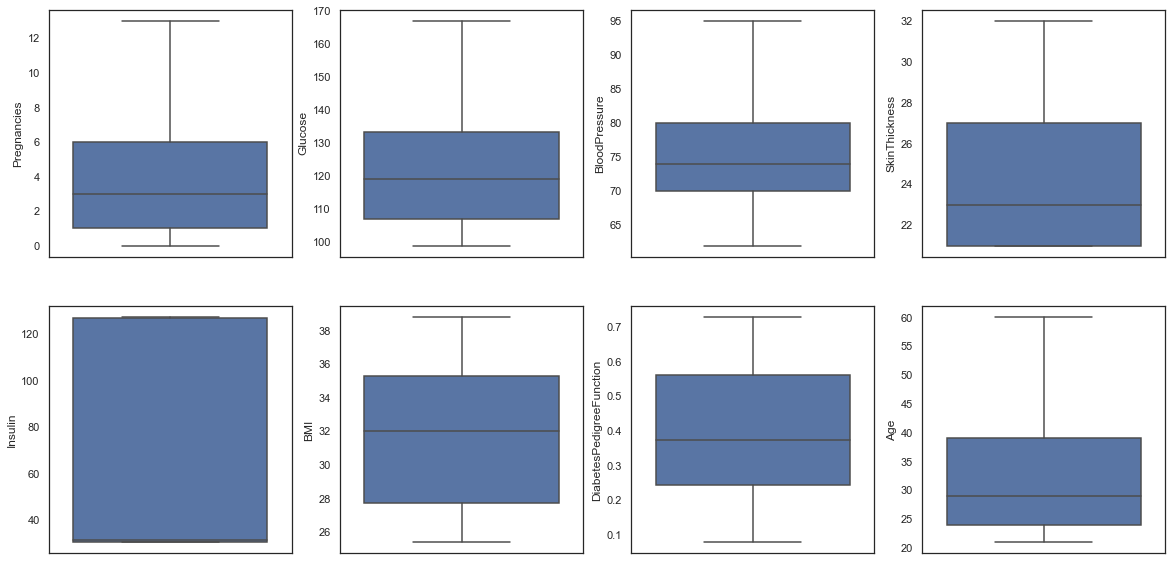

In [57]:
# Final check for outliers after the data is cleaned
display_outliers(df)

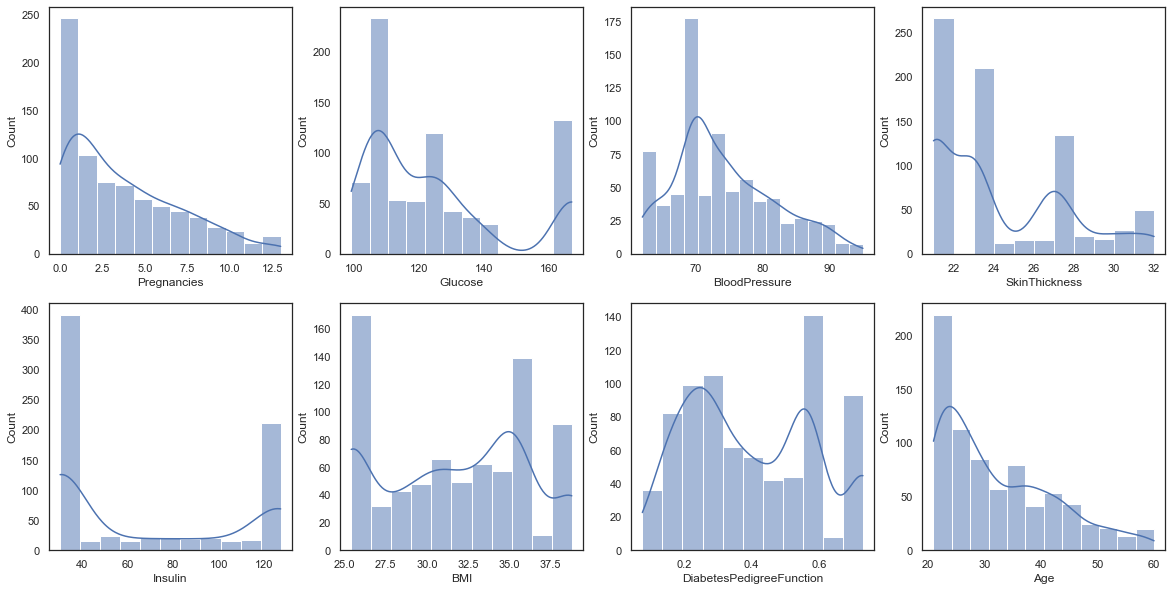

In [58]:
# After replacing 0 with mean value for the above mentioned columns, these are the histograms once again
display_hist(df)

##### Reviewing histograms after replacing 0s with mean for each column:

The data is still pretty skewed<br> But the issue of 0s for Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age are now gone.
The outliers are also gone.




***
##### Comparing the dataframe before and after replacing the missing values in these columns: Glucose, BloodPressure, SkinThickness, Insulin and BMI

In [59]:
# original data
df_cp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
# Data stats after missing values replaced with mean of the column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.78776,124.515625,74.278646,24.195312,67.372396,31.697559,0.401075,32.294271,0.348958
std,3.27019,21.989562,7.526950,3.327555,42.354090,4.471367,0.188893,10.052502,0.476951
min,0.00000,99.000000,62.000000,21.000000,30.500000,25.400000,0.078000,21.000000,0.000000
25%,1.00000,107.000000,70.000000,21.000000,30.500000,27.700000,0.243750,24.000000,0.000000
50%,3.00000,119.000000,74.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.00000,133.250000,80.000000,27.000000,127.062500,35.300000,0.561750,39.000000,1.000000
max,13.00000,167.000000,95.000000,32.000000,127.250000,38.775000,0.728000,60.000000,1.000000


##### Observation
For all the columns except Pregnancies and Outcome, the minimum values got changed from 0 to something more relevant data. <br>
As I also changed the maximum values for some columns, std, 1st and 3rd quartile data also got changed. <br>
Though the overall diatribution is pretty messy, but the data seems more relevant.

***
#### Identify datatypes of the columns in the dataset
***

In [61]:
# Total counts per field are still same. There is no null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [62]:
## Display columns and their data types for the dataset
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

##### Observation
As I changed the data for 0 and adjusting minimum and maximum values in the previous step, the datatype for all columns except Outcome changed to Float64. <br>
They were int64 before

In [63]:
# Column datatypes frequency distribution

data_structure = df.dtypes.to_frame('dtypes').reset_index()
ds = data_structure['dtypes']
dt_counts = ds.value_counts()
dt_counts = dt_counts.reset_index()
dt_counts.columns = ['Data Types', 'Count Freq']
# calculate %
dt_counts['Percentage'] = round(dt_counts['Count Freq']/dt_counts['Count Freq'].sum() *100, 2)
dt_counts

,Data Types,Count Freq,Percentage
0,float64,8,88.89
1,int64,1,11.11


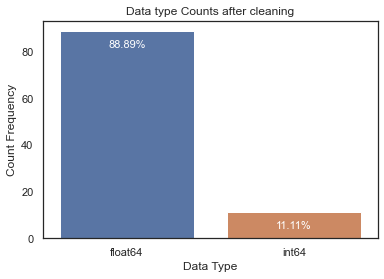

In [64]:
# display data type counts in bar plot
sns.barplot(x = 'Data Types', y = 'Percentage', data = dt_counts)
plt.title('Data type Counts after cleaning')
plt.xlabel('Data Type')
plt.ylabel('Count Frequency')

#place the labels
ax = plt.gca()
y_max = dt_counts['Percentage'].max() 
ax.set_ylim(0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height() - 8, '{:0.2f}%'.format(p.get_height()), 
        fontsize=11, color='white', ha='center', va='bottom')

***
#### Check the balance of the data by plotting the counts of the Target variable : Outcome


In [65]:
df['Outcome'].dtype

dtype('int64')

In [66]:
df['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

<br>
<strong>The minimum value is 0 and maximum value is 1. The value 0 here does not mean missing. It indicates 'No' for Diabetes prediction. 1 indicates 'Yes' for Diabetes prediction. The datatype is currently set as integer. </strong>


In [67]:
# Data freq of diabetic or non-diabetic
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

There are 500 records with 0 and 268 with 1 values

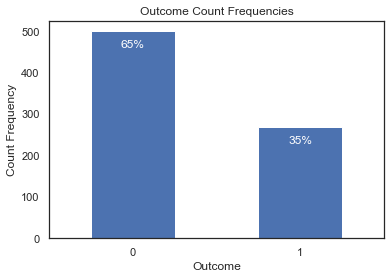

In [68]:
# Visualize the Target variable (Outcome) frequency in the dataset

p= df.Outcome.value_counts().plot(kind="bar")
tot = []
total = df['Outcome'].shape[0]

plt.title('Outcome Count Frequencies')
plt.xlabel('Outcome')
plt.ylabel('Count Frequency')
plt.xticks(rotation =0)
#place the labels
ax = plt.gca()
y_max = df['Outcome'].value_counts().max() 
ax.set_ylim(0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,p.get_height() -45, '{:0.0f}%'.format(round(p.get_height()/total *100,2)), 
                    fontsize=12, color='white', ha='center', va='bottom')

##### Non Diabetic (0) cases are almost twice the Diabetic (1) cases in the given dataset. The data in the Outcome column is not balanced. <br>
As the data is highly unbalanced, it has high bias for class 0. This will cause Type 1 error (False Positive) 

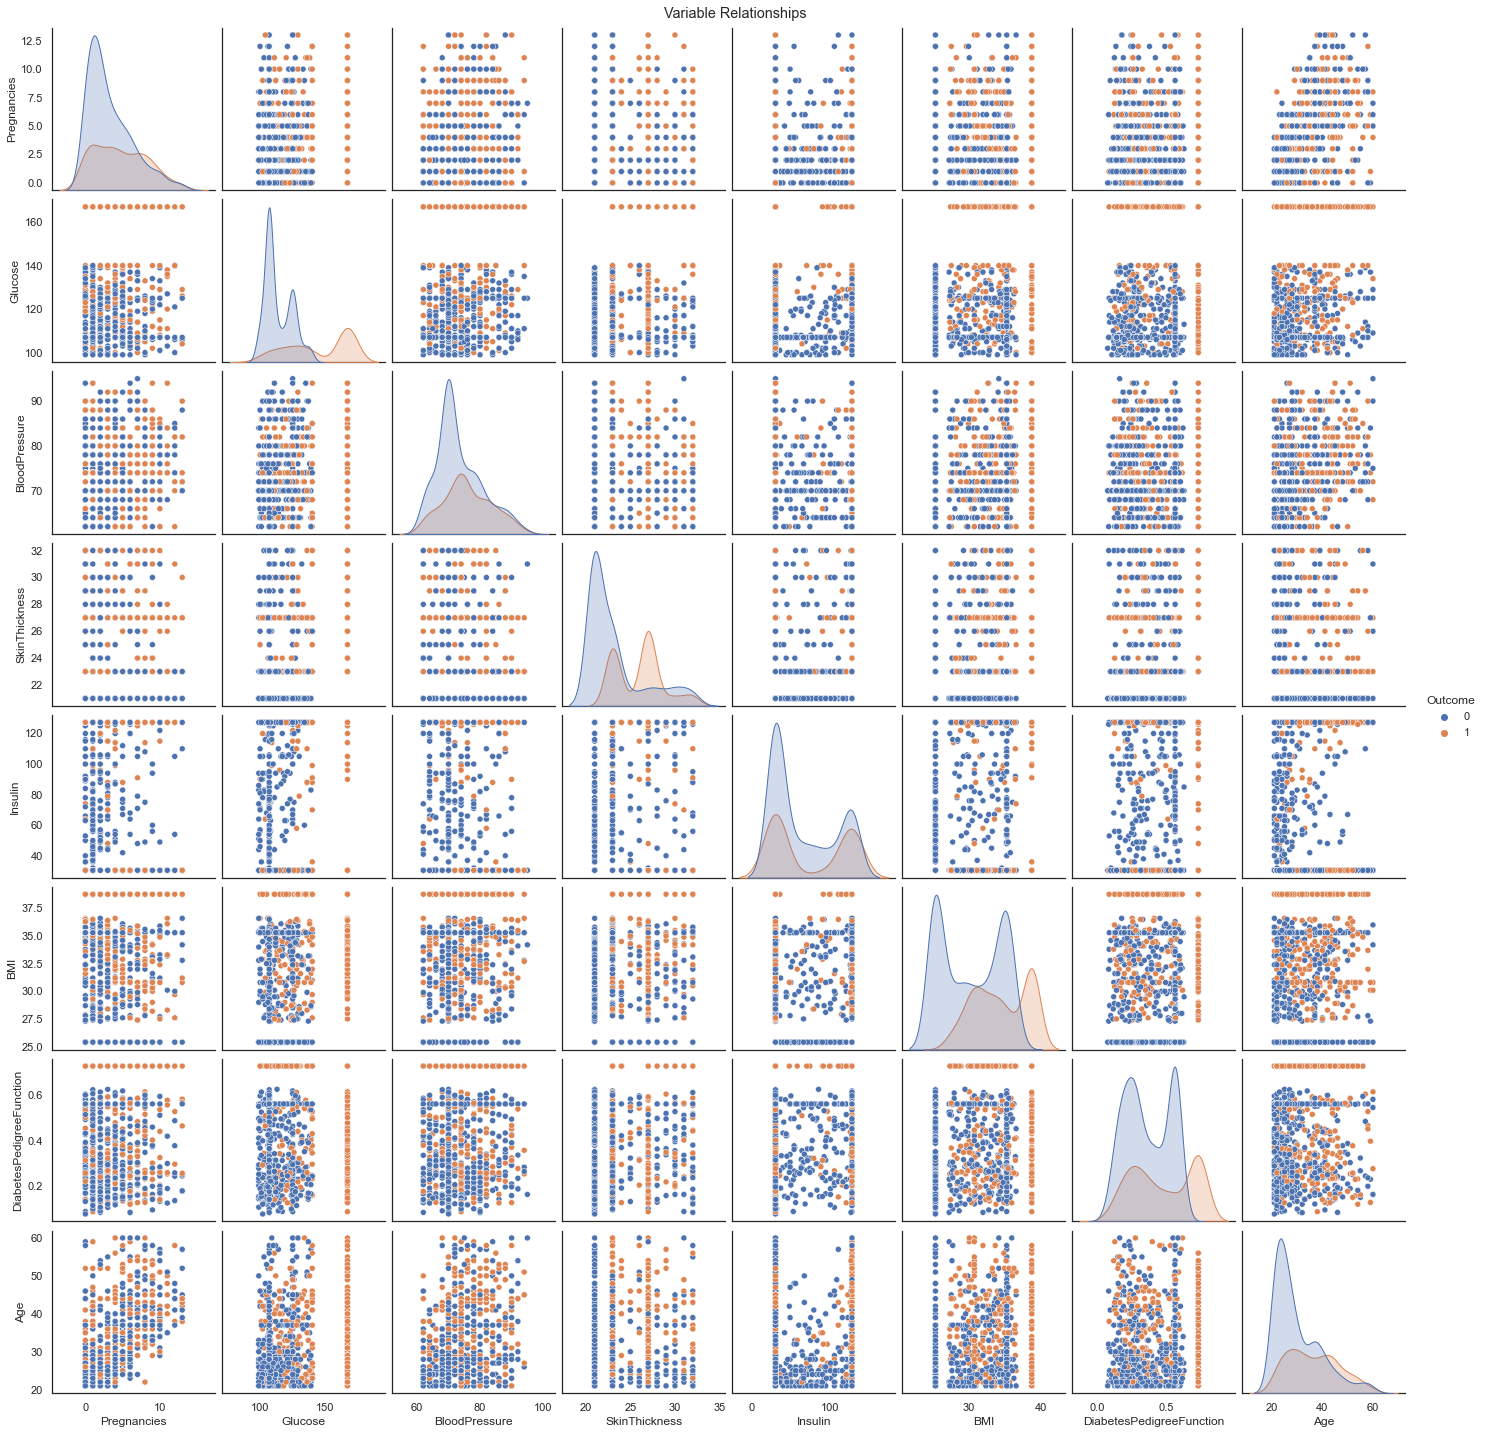

In [69]:
# create Scatterplots to understand correlations with the cleaned data

p = sns.pairplot(df, hue ='Outcome')
p.fig.suptitle('Variable Relationships', y = 1)
plt.show()

##### Observation
<b> Diabetes onset</b> is marked as Orange in the scatterplot. There is a moderate positive relationship between Age and Pregnancies

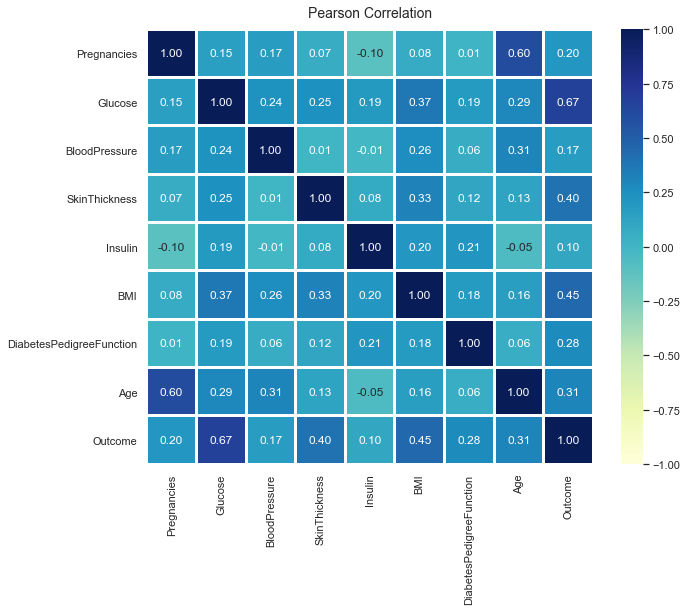

In [70]:
# heatmap to show correlationship for cleaned data

plt.figure(figsize=(10,8))
heatmap = sns.heatmap(df.corr(method = "pearson"), cmap='YlGnBu', annot = True, linewidth = 2, vmin =-1., vmax =1., fmt = '.2f',
                     cbar = True)
heatmap.set_title('Pearson Correlation', fontdict={'fontsize':14}, pad=12);


<b>All predictor variables have positive correlation with Outcome </b>

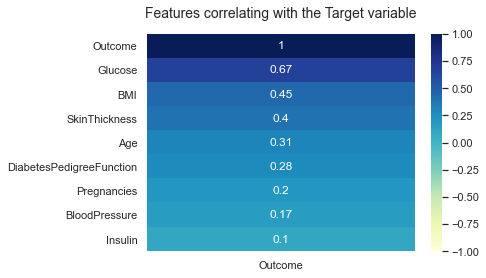

In [71]:
# How features correlated to the target variable (Output) in sorted order

df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False)
heatmap = sns.heatmap(df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features correlating with the Target variable', fontdict={'fontsize':14}, pad=16);

<b>Observation: </b>As indicated in the scattered plot above, Gluscose and the target variable 'Outcome' have highest positive relationship <br>

***
#### Model Building
***

<b>Steps: </b>

- Identify predictor and target variables
- Split dataset into Training and Test
- Feature Scaling
- Correct un balanced target data using SMOTE
- Identify models to include
- Collect the best possible parameters for each models
- Run and compare the model accuracies
- Get the model with the best accuracy score

***
##### Features and Target Variables. Split dataset into 70:30 ratio as the dataset is small<br>
 

In [72]:
# collecting features for future use
#features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction','BloodPressure', 'Pregnancies','SkinThickness', 'Insulin']

features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'Pregnancies','SkinThickness', 'Insulin']

# copying the dataset to start clean
df_clean = df.copy(deep = True)

# Prepare the dataset for modelling
#Split the data into 70 - 30 

X = df_clean[features]
y = df_clean['Outcome']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y)



In [73]:
# check the train test shapes

print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (537, 8)
y_train (537,)


In [74]:
# check test data shapes
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (231, 8)
y_test (231,)


***
### Balancing dataset using SMOTE
As this is an unbalanced dataset , some machine learning models have builtin learning functionality to compensate this and some does not. 
Here the target variable Outcome is a binary variable. The balanced plot for Outcome variable showed that the number of diabetic patients is 268 while the number of non-diabetic people is 500. That means, the Outcome is biased. That means the model will have  poor  predictive  performance,  specifically  for  the  minority  class (ie Diabetic prediction).

To resolve this class imbalance, resampling technique can be used which will do random oversampling and undersampling. As the dataset is small,resampling needs to be done only for the training dataset. 

<b>Oversampling</b> means to randomly duplicate the records from minority class and <b>undersampling</b> means removing or deleting records from the majority class.


<b>SMOTE (Synthetic Minority Oversampling Technique)</b> is one way to balance the dataset.

In [75]:
# before applying SMOTE, the shape of the train dataset
y_train.shape

(537,)

In [76]:
sm = SMOTE(sampling_strategy = 'auto', k_neighbors=10, random_state =10)
X_train, y_train = sm.fit_resample(X_train, y_train) 

In [77]:
# check if the number of records for training dataset has increased
y_train.shape

(700,)

***
#### Feature Scaling

As all input features are numerical values, will perform Standardization ie Z-Score normalization

$ x = \frac{x - \mu }{\sigma} $
<br>
where $\mu$ = mean, $\sigma$ = standard deviation
<br> 
This is done to put scales for all predictor variables in the same scale

In [78]:
standard_scaler = preprocessing.StandardScaler()
X_train = standard_scaler.fit_transform(X_train) # scale the train dataset. Model will use mean and variance
X_test = standard_scaler.transform(X_test) # scale and transform test dataset to use the same mean and variance as train dataset

# check the training dataset 
pd.DataFrame(X_train, columns = features).describe()

,Glucose,BMI,Age,DiabetesPedigreeFunction,BloodPressure,Pregnancies,SkinThickness,Insulin
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
mean,-1.396978e-15,1.931788e-16,-3.375871e-16,1.248208e-16,9.417863e-16,1.002373e-16,-1.507683e-15,5.265629e-17
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00
min,-1.222427e+00,-1.583193e+00,-1.284908e+00,-1.796988e+00,-1.783550e+00,-1.299770e+00,-1.127096e+00,-8.003069e-01
25%,-8.855973e-01,-7.686035e-01,-8.917113e-01,-8.567454e-01,-6.716742e-01,-9.608923e-01,-1.127096e+00,-8.003069e-01
50%,-2.540421e-01,6.926031e-02,-2.036171e-01,-8.783267e-02,-1.157362e-01,-7.429368e-02,-5.055143e-01,-8.003069e-01
75%,5.038241e-01,7.209322e-01,6.810755e-01,7.827433e-01,7.181708e-01,8.448136e-01,7.376485e-01,1.455799e+00
max,1.640623e+00,1.529703e+00,2.548760e+00,1.669318e+00,2.802938e+00,2.683028e+00,2.291602e+00,1.465726e+00


<b> Now, the mean values got down to 0 and std to 1 for all input features</b>

***
### Build Classification algorithm
<b> Approach</b> <br>
- Build the model with KNN
- Check it's accuracy 
- Use hyper parameter tuning with GridSearchCV to get the best possible score
- Build another model with Support Vector Machine and Logistic Regression and check it's accuracy
- Compare which model gives better accuracy
- Build Ensemble models with Random Forest and Bagging and check their accuracies
- Compare all models and pick the best one
- Perform KFold Cross Validation and pick the model with the best accuracy score

### Models used in this project
***
#### KNN

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm. It is used for classification and regression. It estimates the likelihood of grouping a data point based on commonality of k nearest neighbors. Weights are assigned to the neighbors based on the distance from the data point. That means closed data points will have more weights than others. Normally k is a positive integer. Smaller k value means a very few nearest neighbors will be picked for classification. This usually results in model overfitting. Also a very big k indicates a lots of nearest neighbors will be picked. In that case model will be underfitting. So, a proper k value needs to be identified. As this method is a supervisedML algorithm, it relies on labelled input data to predict classes for unlabelled data points.
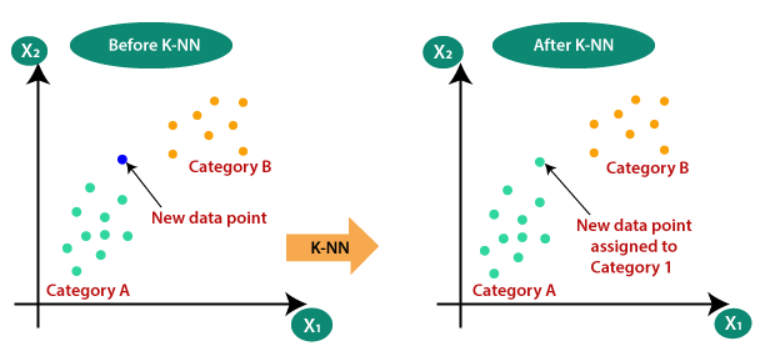

#### SVM
Support Vector Machine (SVM) is a supervised machine learning algorithm that is used to identify a hyperplane that got the maximum distance between the two classes in a training dataset. Using that information, it can classify any new datapoints.

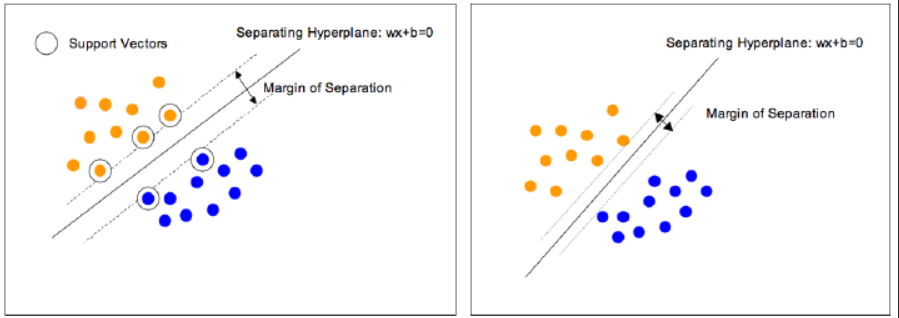

#### Logistic Regression
Logistic regression is a supervised classification algorithm. It utilize a linear combination of an input datapoint to solve a binary classification problem (i.e., there are only two possible classes). 
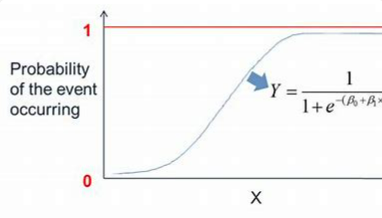

#### Random Forest
The bootstrapping Random Forest algorithm combines ensemble learning methods with the decision tree framework to create multiple randomly drawn decision trees from the data, averaging the results to output strong predictions/classifications.

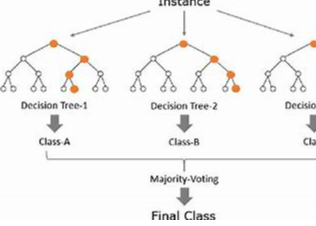

#### Bagging
Bagging technique is also called bootstrap aggregation. It is a data sampling technique where data is sampled with replacement. Bootstrap aggregation is a machine learning ensemble meta-algorithm for reducing the variance of an estimate produced by bagging, which reduces its stability and enhances its bias.

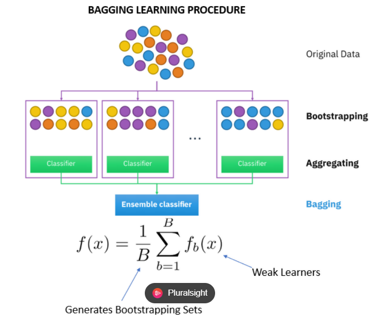
***


#### Confusion Matrix: 
Confusion Matrix is used to evaluate the performance of a classifier.

TP: actual value is Positive and predicted is also Positive<br>
TN: actual value is Negative and prediction is also Negative<br>
FP: actual is negative but prediction is Positive<br>
FN: actual is Positive but the prediction is Negative<br>

<b>Precision</b> = $ \frac{(TP)} {(TP+FP)} $   Gives how many predictions are actually positive out of all the total positive predicted.<br>
<b>Recall/ Sensitivity</b> = $ \frac{(TP)}{(TP+FN)} $  Out of all the positive classes, how much we have predicted correctly. <br>
<i>In medical prediction, it is important to predict actual positive cases! So, recall score is highly important in this project<i><br>
<b>F1-Score</b> = Harmonic mean of precision and recall
    <br>
    
##### AUC ROC Curve
ROC is a probability curve and AUC is the measure of separability. It tells how much the model is capable of distinguishing between classes. <br>
Higher AUC indicates better predicting 0 classes as 0 and 1 classes as 1. <br>
<i> In this project, we would like to see higher AUC, which means how well the model can distinguish between patients with diabetes and not. </i>
    
    
***
 

In [79]:
# display Confusion Matrix

def display_cm(y_test, y_predict)->float:
    '''
    Displays Confusion matrix
    input parameters: 
    y_test array , y_pred array
    
    returns:
    acc_score  - Accuracy Score
    
    '''
    acc_score = metrics.accuracy_score(y_test, y_predict)
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot= True, fmt ="d")
    plt.title(f"Accuracy Score: {acc_score:0.3f}\n")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    
    return acc_score

def display_clf_report(model, X_train= X_train, y_train= y_train,
                      X_test = X_test, y_test = y_test)->float:
    '''
    Input:
    model: model to fit
    X_train = features from training dataset
    y_train = target from training dataset
    X_test = features from test dataset
    y_test = features from test dataset
    
    Returns:
    acc_score - Accuracy Score
    '''
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    acc_score = display_cm(y_test, y_predict)
    print(classification_report(y_test, y_predict))
    
    return acc_score

def display_roc_curve(m):
    '''
    This function takes the name of the model and display ROC AUC curve
    Returns the score
    '''
    y_pred_proba = m.predict_proba(X_test)[:,1]
    #fp, tp, th = roc_curve(y_test, predicted)
    fp, tp, th = roc_curve(y_test, y_pred_proba)
    #  fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    model = m.__class__.__name__
    plt.plot(fp, tp, lw=1, alpha=0.8, label='ROC %s (AUC = %0.2f)'  % (model, roc_auc_mla))
   
    #    index+=1

    plt.title('ROC Curve comparison')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()
    return roc_auc_mla

def print_scores(y_pred, model):
    print('\nPrediction Results: \n')
    print('Training Accuracy: ', model.score(X_train, y_train))
    print('Testing Accuracy: ', model.score(X_test, y_test))
    print('Precision: ', precision_score(y_test, y_pred, average = 'weighted'))
    
    print('Recall: ', recall_score(y_test, y_pred, average = 'weighted'))
    print('F1-Score: ', f1_score(y_test, y_pred, average = 'weighted'))

 n_neighbors(k) =  3


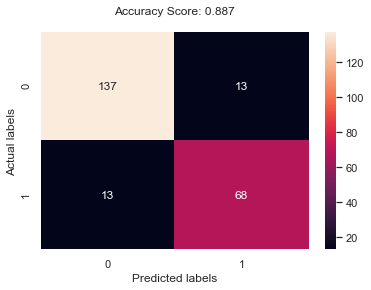

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.84      0.84      0.84        81

    accuracy                           0.89       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.89      0.89      0.89       231



In [80]:
#KNN Model

# getting the optimal k value for knn model
error_rate = []
for i in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
req_k_value = error_rate.index(min(error_rate))+1

print (" n_neighbors(k) = ", req_k_value)
knn_model = KNeighborsClassifier(n_neighbors=req_k_value, metric ="minkowski", p =2) # model
knn_accuracy= display_clf_report(knn_model)




In [81]:
# applying Gridsearch
k_range = list(range(1,45))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

param_grid = dict(n_neighbors = k_range, weights = weight_options, algorithm = algorithm) # creating the list of values to pass for parameter k
grid = GridSearchCV(knn_model, param_grid, cv= 10, scoring ='accuracy', return_train_score = False)
grid.fit(X,y)
print("Best Parameters: ",grid.best_params_)
print("Best Estimator:", grid.best_estimator_)


Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
Best Estimator: KNeighborsClassifier(n_neighbors=4, weights='distance')


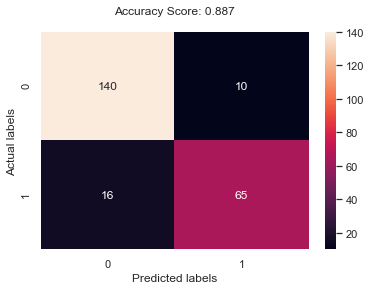

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       150
           1       0.87      0.80      0.83        81

    accuracy                           0.89       231
   macro avg       0.88      0.87      0.87       231
weighted avg       0.89      0.89      0.89       231



In [82]:
#print("Model: KNN")
#print("Best Score: ", grid.best_score_)
#print("Best Parameters: ",grid.best_params_)
#print("Best Estimator:", grid.best_estimator_)

knn_model = KNeighborsClassifier(n_neighbors=10, weights ='uniform', algorithm='auto') # model
knn_accuracy = display_clf_report(knn_model)


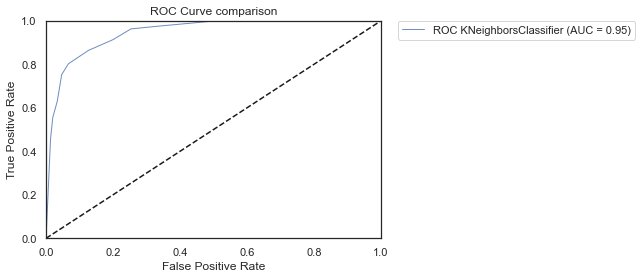

In [83]:
k_auc = display_roc_curve(knn_model)

##### Observations

KNN model is able to detect 80% of the diabetic cases(recall) and 87% of it's prediction are correct (precission). F1-Score is 83%. Test Accuracy is 89%. AUC score is 95%<br>
Overall a very good prediction

##### Support Vector Machine
Doing Gridsearch to find the best possible parameters first

In [84]:
param = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
         'C': [1,10, 20],
         'degree':[1,3,8],
         'coef0': [0.00001, 0.01, 0.001, .10, 0.5, 1],
         'gamma':('auto', 'scale')
        }


In [85]:
svm_model = SVC()
GridS = GridSearchCV(svm_model, param, cv =10)
GridS.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 20],
                         'coef0': [1e-05, 0.01, 0.001, 0.1, 0.5, 1],
                         'degree': [1, 3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [86]:
GridS.best_params_

{'C': 10, 'coef0': 1e-05, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

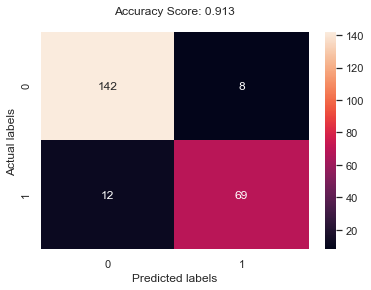

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.90      0.85      0.87        81

    accuracy                           0.91       231
   macro avg       0.91      0.90      0.90       231
weighted avg       0.91      0.91      0.91       231



In [87]:
svm_model = SVC(kernel = 'rbf', C=10, gamma = 'scale', coef0 = 0.00001, degree = 1, probability=True)
svm_accuracy = display_clf_report(svm_model)

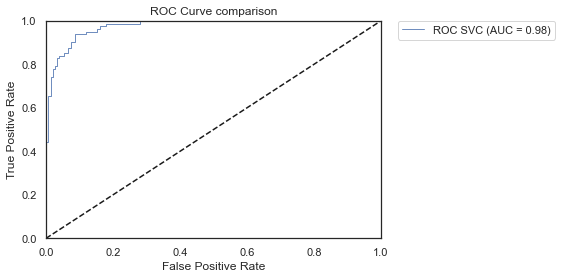

In [88]:
s_auc = display_roc_curve(svm_model)

##### Observations

SVM model is able to detect 85% of the diabetic cases(recall) and 90% of it's prediction are correct (precision). The test accuracy score is 91%. AUC score is 98%


In [89]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr_model = LogisticRegression()
GridS = GridSearchCV(lr_model, grid,cv =10)
GridS.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",GridS.best_params_)
print("accuracy :",GridS.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8457142857142858


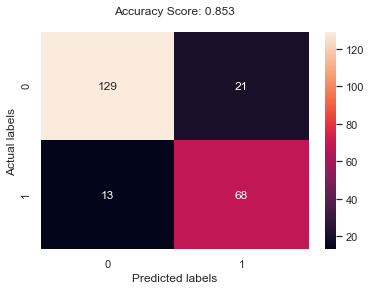

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       150
           1       0.76      0.84      0.80        81

    accuracy                           0.85       231
   macro avg       0.84      0.85      0.84       231
weighted avg       0.86      0.85      0.85       231



In [90]:
#Logistic Regression Model

lr_model = LogisticRegression(random_state = 0, C=0.01, penalty= 'l2') # model
lr_accuracy = display_clf_report(lr_model)

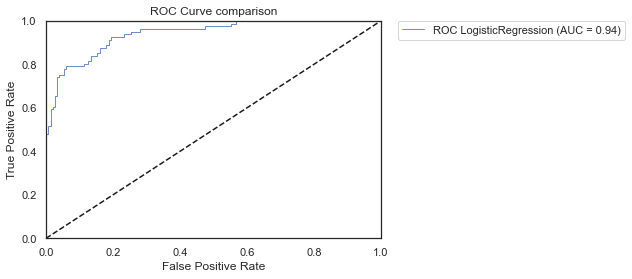

In [91]:
l_auc= display_roc_curve(lr_model)

##### Observations

Logistic Regression model is able to detect 84% of the diabetic cases(recall) and 76% of it's prediction are correct (precission). The test accuracy score is 85%. AUC score is 94%

##### Comparing KNN with Logistic Regression and SVM

In [92]:
models =pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'SVM'],
    'Train Score':[knn_model.score(X_train,y_train), lr_model.score(X_train,y_train), svm_model.score(X_train,y_train)],
    'Test Score': [knn_accuracy, lr_accuracy, svm_accuracy],
    'AUC': [k_auc, l_auc, s_auc]
})

# sorting the output based on the accuracy rate
models.sort_values(by = 'Test Score', ascending = False, ignore_index = True)

,Model,Train Score,Test Score,AUC
0,SVM,0.971429,0.913420,0.976296
1,KNN,0.900000,0.887446,0.946379
2,Logistic Regression,0.852857,0.852814,0.941317


##### Observation
Clearly SVM is better than KNN based on Test Accuracy score and AUC score. But, will see if there are other models with better score than SVM.
<br>So trying an ensemble model to see if that can predict better

In [93]:
# Random Forest
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc_model =  ensemble.RandomForestClassifier(random_state =0)
GridS = GridSearchCV(rfc_model, grid,cv =10)
GridS.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",GridS.best_params_)
print("accuracy :",GridS.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
accuracy : 0.9457142857142857


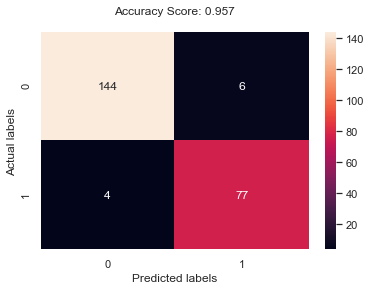

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       150
           1       0.93      0.95      0.94        81

    accuracy                           0.96       231
   macro avg       0.95      0.96      0.95       231
weighted avg       0.96      0.96      0.96       231



In [94]:
rfc_model = ensemble.RandomForestClassifier(random_state =0, n_estimators=200, max_features ='auto',criterion ='gini',max_depth=8)
rfc_accuracy = display_clf_report(rfc_model)

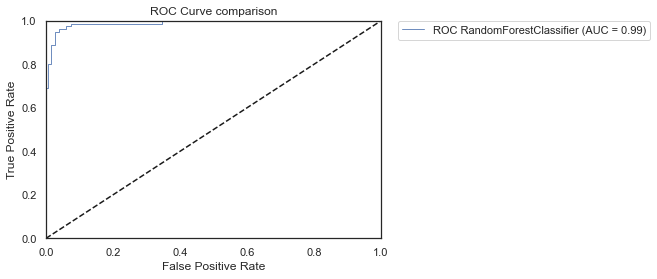

In [95]:
rfc_auc= display_roc_curve(rfc_model)

##### Observations

Random Forest model is able to detect 95% of the diabetic cases(recall) and 93% of it's prediction are correct (precision). The test accuracy score is 96%. The AUC score is 99%

In [96]:
# ensemble.BaggingClassifier()
grid = {"base_estimator__max_depth": [5,10],
         # "base_estimator__max_features": [None, "auto"],
         # "base_estimator__min_samples_leaf": [1, 3, 5],
         # "base_estimator__min_samples_split": [2, 5],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10],
}

bc_model =  ensemble.BaggingClassifier(DecisionTreeClassifier())
GridS = GridSearchCV(bc_model, grid,cv =10)
GridS.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ",GridS.best_params_)
print("accuracy :",GridS.best_score_)

tuned hyperparameters :(best parameters)  {'base_estimator__max_depth': 10, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}
accuracy : 0.9485714285714286


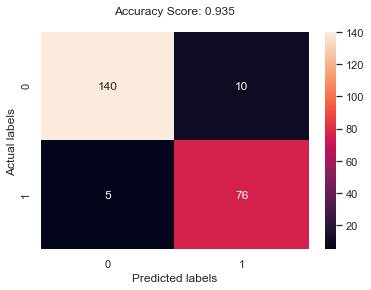

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       150
           1       0.88      0.94      0.91        81

    accuracy                           0.94       231
   macro avg       0.92      0.94      0.93       231
weighted avg       0.94      0.94      0.94       231



In [97]:
bc_model = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth = 5) , bootstrap_features= True, max_features= 0.7, max_samples= 1.0, n_estimators= 10)
bc_accuracy = display_clf_report(bc_model)

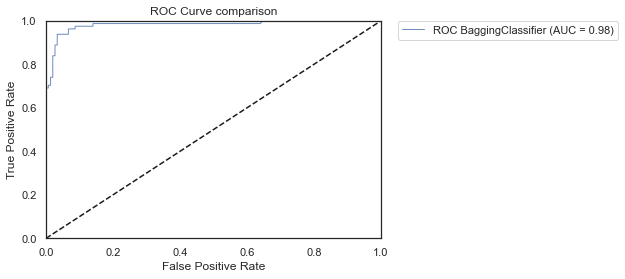

In [98]:
bc_auc= display_roc_curve(bc_model)

##### Observations

Bagging Classifier model is able to detect 96% of the diabetic cases(recall) and 94% of it's prediction are correct (precision). The test accuracy score is 97%. AUC score is 98%

In [99]:
k_tscr = knn_model.score(X_train,y_train)
l_tscr = lr_model.score(X_train,y_train)
s_tscr = svm_model.score(X_train,y_train)
r_tscr = rfc_model.score(X_train,y_train)
b_tscr = bc_model.score(X_train,y_train)



m =pd.DataFrame({
     'Train Score':[k_tscr,l_tscr,s_tscr,r_tscr,b_tscr],
    'Accuracy Score': [knn_accuracy, lr_accuracy, svm_accuracy, rfc_accuracy,bc_accuracy],
    'AUC': [k_auc, l_auc, s_auc, rfc_auc, bc_auc]
}, index= ['KNN', 'Logistic Regression', 'SVM', 'Random Forest', 'Bagging Classifier'],
)

# sorting the output based on the accuracy rate
m.sort_values(by = 'Accuracy Score', ascending = False, ignore_index = False)

,Train Score,Accuracy Score,AUC
Random Forest,0.994286,0.956710,0.990041
Bagging Classifier,0.964286,0.935065,0.982099
SVM,0.971429,0.913420,0.976296
KNN,0.900000,0.887446,0.946379
Logistic Regression,0.852857,0.852814,0.941317


<b>Observation: </b><u><i>Bagging Classifier</i></u> out performs Random Forest, KNN, SVM or Logistic regression. Will do K-Fold Cross validation now to make sure the accuracy is correct.

##### Performing KFold Cross Validation

To get a better understanding of the accuracy of these models, performing the KFold Cross Validation

In [100]:
# evaluate each model in turn

est_models = []
est_models.append(('KNN', KNeighborsClassifier(n_neighbors=10, weights ='uniform', algorithm='auto')))
est_models.append(('LR', LogisticRegression(random_state = 0, C=0.01, penalty= 'l2')))
est_models.append(('SVM', SVC(kernel = 'rbf', C=20, gamma = 'scale', coef0 = 0.00001, degree = 1, probability=True)))
est_models.append(('Random Forest',ensemble.RandomForestClassifier(random_state =0, n_estimators=200, max_features ='log2',criterion ='gini',max_depth=6) ))
est_models.append(('Bagging Classifier', ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth = 10) , bootstrap_features= True, max_features= 1.0, max_samples= 0.5, n_estimators= 20)))

results = []
names = []
scoring = 'accuracy'
print("KFold Accuracy \n")

 

# Recording cross validation score for each models

for name, model in est_models:
    kfold = model_selection.KFold(n_splits=200)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) # cross validation score
    results.append(cv_results)
    names.append(name)
    msg = "%s: Mean: %f, Std: (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
    

KFold Accuracy 

KNN: Mean: 0.879583, Std: (0.170110)
LR: Mean: 0.839583, Std: (0.190018)
SVM: Mean: 0.923750, Std: (0.138889)
Random Forest: Mean: 0.939583, Std: (0.127186)
Bagging Classifier: Mean: 0.945833, Std: (0.118659)


<b>Observation: </b>Bagging Classifier mean accuracy score is still best out of all the models

##### Check the important features used by Bagging Classfier

In [101]:
# get feature importances
fi = np.mean ([tree.feature_importances_ for tree in bc_model.estimators_], axis=0)
fi

array([0.23227113, 0.17984886, 0.17003315, 0.21964751, 0.19819935])

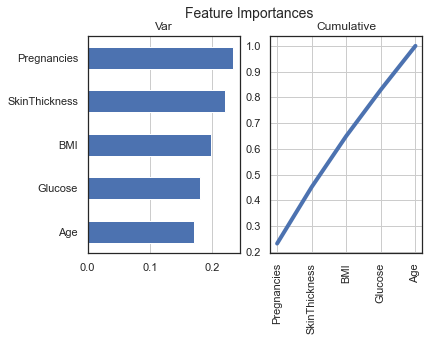

,Importance,Cumulative
Var,,
Pregnancies,0.232271,0.232271
SkinThickness,0.219648,0.451919
BMI,0.198199,0.650118
Glucose,0.179849,0.829967
Age,0.170033,1.000000


In [102]:
features = ['Pregnancies', 'Glucose', 'Age', 'SkinThickness', 'BMI'] # picking 5 features
# get the importances into dataframe
df_imp = pd.DataFrame({'Importance': fi, 'Var': features}).sort_values('Importance', ascending = False)
df_imp['Cumulative'] = df_imp['Importance'].cumsum(axis =0)
df_imp = df_imp.set_index('Var')
df_imp

# Bagging Classifier Model 
# plotting
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = False)
fig.suptitle('Feature Importances', fontsize = 14)
ax[0].title.set_text('Var')
df_imp[['Importance']].sort_values(by = 'Importance').plot(kind = 'barh', legend = False, ax=ax[0]).grid(axis='x')
ax[0].set(ylabel='')


ax[1].title.set_text('Cumulative')
df_imp[['Cumulative']].plot(kind = 'line', linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel='', xticks=np.arange(len(df_imp)), xticklabels = df_imp.index)
plt.grid(axis='both')
plt.grid(True)
plt.xticks(rotation =90)
plt.show()
# get feature importances
#fi = m.feature_importances_

# get the importances into dataframe
df_imp = pd.DataFrame({'Importance': fi, 'Var': features}).sort_values('Importance', ascending = False)
df_imp['Cumulative'] = df_imp['Importance'].cumsum(axis =0)
df_imp = df_imp.set_index('Var')
df_imp

These are the top 5 features important for Bagging Classifier to predict

***
#### Final Model ####
With high AUC score of <b>99%</b> and no apparent sign of overfitting, I will pick <b>Bagging Classifier</b>
***